**Predicting Retail Sales Using Data Analytics**

0. Obtaining Our Dataset From Kaggle

In [1]:
#Using the code to obtain the dataset from Session 2

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt #Getting graphs that connects with our dataset
import seaborn as sns


# Download latest version
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

print("Path to dataset files:", path)

data_sales = pd.read_csv(path + '/sales data-set.csv')
data_stores = pd.read_csv(path + '/stores data-set.csv')
data_features = pd.read_csv(path + '/Features data set.csv')

Using Colab cache for faster access to the 'retaildataset' dataset.
Path to dataset files: /kaggle/input/retaildataset


In [2]:
# Convert 'Date' column to datetime objects with the correct format
data_features['Date'] = pd.to_datetime(data_features['Date'], format='%d/%m/%Y')
data_sales['Date'] = pd.to_datetime(data_sales['Date'], format='%d/%m/%Y')

1. Data Exploration

In [3]:
#Checking to see if we have any null values for our datasets
display(data_sales.isnull().sum())
display(data_stores.isnull().sum())
display(data_features.isnull().sum())

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


,0
Store,0
Type,0
Size,0


,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


Refering to Our Session 2 assignment for our graphs:

**A**: Plot **one** visualization using 'sales data-set.csv', and explain what it shows

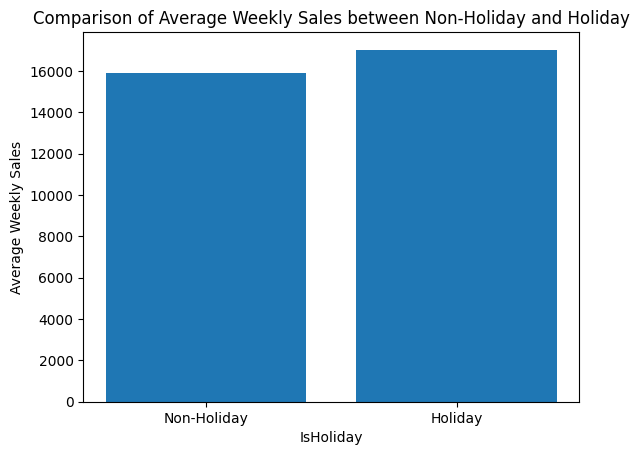

In [4]:
#Creating a barplot to show comparisons on average weekly sales between non-holiday and holiday

average_weekly_sales_holiday = data_sales.groupby('IsHoliday')['Weekly_Sales'].mean()

plt.bar(average_weekly_sales_holiday.index, average_weekly_sales_holiday.values)
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.title('Comparison of Average Weekly Sales between Non-Holiday and Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

Based on our bar graph, we see that the average weekly sales on Holidays is higher than the average weekly sales on Non-Holidays. This is possibly due to the discount prices on Holidays.

**B**: Plot **two** visualizations (of different types) using 'stores data-set.csv' and explain what it shows

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


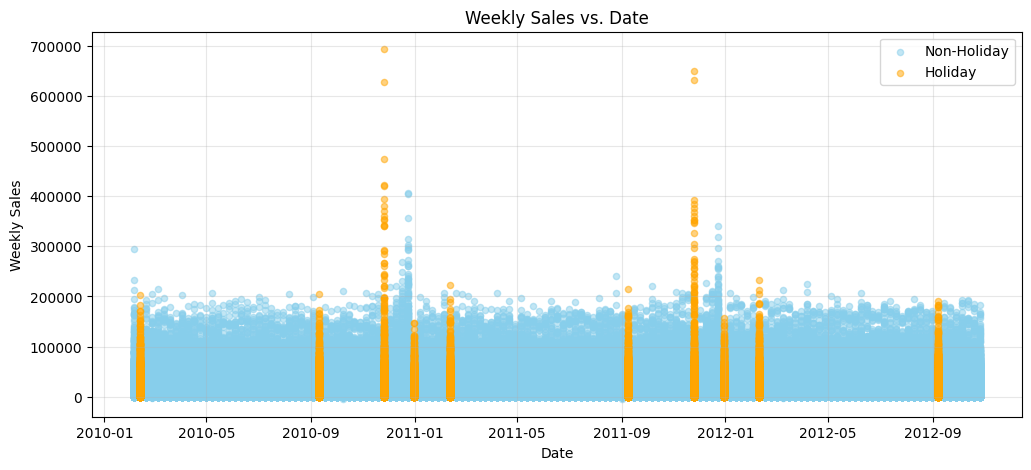

In [5]:
#Scatterplot on Weekly Sales vs. Date

fig, ax = plt.subplots(figsize=(12,5))

#Non-holidays
non_holiday_data = data_sales[data_sales['IsHoliday'] == False]
ax.scatter(non_holiday_data['Date'], non_holiday_data['Weekly_Sales'], label='Non-Holiday'
, alpha=0.5, s=20, color='skyblue')

#Holidays
holiday_data = data_sales[data_sales['IsHoliday'] == True]
ax.scatter(holiday_data['Date'], holiday_data['Weekly_Sales'], label='Holiday'
, alpha=0.5, s=20, color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
ax.set_title('Weekly Sales vs. Date')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

This scatterplot shows where weekly sales trends the highest on holidays.

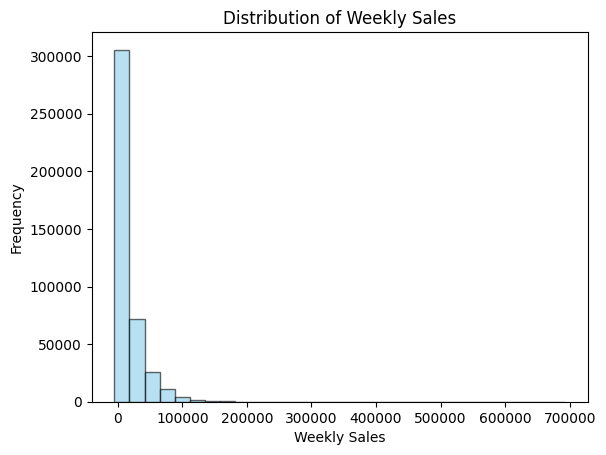

In [6]:
#Plotting a histogram to show Weekly Sales
plt.hist(data_sales['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

This histogram shows the where weekly sales has the most frequency and if there are any outliers

**C:** Plot **one** observation about 'Features data set.csv' and explain it

Text(0.5, 1.0, 'Comparison of Average Unemployment between Non-Holiday and Holiday')

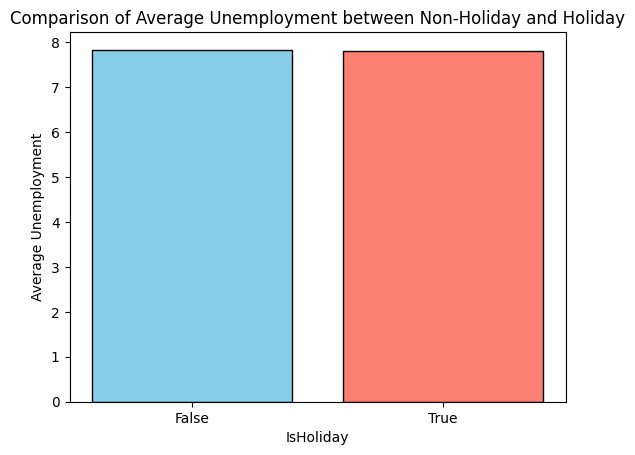

In [7]:
#Plotting to see the number of unemployment on holidays vs non-holidays

average_unemployment_holiday = data_features.groupby('IsHoliday')['Unemployment'].mean()

plt.bar(average_unemployment_holiday.index.astype(str),
        average_unemployment_holiday.values,
        color=['skyblue', 'salmon'],
        edgecolor='black')
plt.xlabel('IsHoliday')
plt.ylabel('Average Unemployment')
plt.title('Comparison of Average Unemployment between Non-Holiday and Holiday')

The barplot shows that comparison for average unemployment is almost the same betweeen Holiday and non-holiday.

**D:** Combine two (or three) CSVs and **show one relationship** (or lack thereof) between fields from different CSVs

In [8]:
#Merge data_sales and data_features
merged_data = pd.merge(data_sales, data_features, on=['Store', 'Date', 'IsHoliday'], how='left')
display(merged_data.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


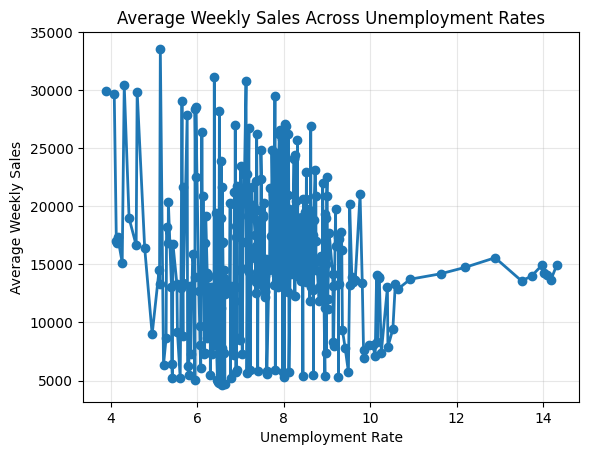

In [9]:
#Plotting on showing on the Unemployment vs Weekly Sales

#First, we aggreagate the data to show a cleaner representation of the data
weekly_sales_unemployment = (merged_data.groupby('Unemployment')
['Weekly_Sales'].mean().reset_index().sort_values(by='Unemployment'))

#Line chart
plt.plot(
    weekly_sales_unemployment['Unemployment'],
    weekly_sales_unemployment['Weekly_Sales'],
    marker='o',
    linewidth=2,
)

plt.xlabel('Unemployment Rate')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales Across Unemployment Rates')
plt.grid(True, alpha=0.3)
plt.show()


The line chart shows the relationship between unemployment and weekly sales. Weekly sales tend to be higher when unemployment rates are low, and sales decline as unemployment increases.

2. Relationships Within the Data (Using Regressions, Plotting Correlation)

In [10]:
#Merge the three datasets into one dataset
data = pd.merge(data_sales, data_stores, on=['Store'], how='inner')
data = pd.merge(data, data_features, on=['Store', 'Date'], how='inner')

print(data.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170        

In [11]:
#Checking to see if we have null values in the merged dataset
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [12]:
data = data.fillna(0)

In [13]:
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0


In [14]:
data['IsHoliday'] = data['IsHoliday_x'] | data['IsHoliday_y']
data = data.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

**Regression Analysis**

* Running a regression analysis on **Weekly Sales vs. Unemployment**

* **Hypothesis:** Weekly Sales decreases as unemployment rate increases

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression

X = data[['Unemployment']]
y = data['Weekly_Sales']

lr_model = LinearRegression()
lr_model.fit(X, y)

slope = lr_model.coef_[0]
intercept = lr_model.intercept_
r_squared = lr_model.score(X, y)
correlation = data['Unemployment'].corr(data['Weekly_Sales'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"Correlation between Unemployment and Weekly_Sales: {correlation}")


Slope: -315.24545740477413
Intercept: 18490.70297408334
R-squared: 0.0006689318311839942
Correlation between Unemployment and Weekly_Sales: -0.025863716499837663


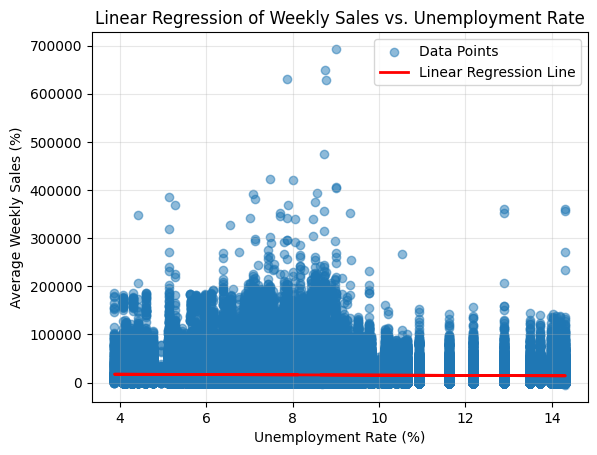

In [16]:
#Visualization of the Linear Regression
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X, lr_model.predict(X), color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Average Weekly Sales (%)')
plt.title('Linear Regression of Weekly Sales vs. Unemployment Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
#using ols library to check
import statsmodels.api as sm

X = data['Unemployment']
y = data['Weekly_Sales']

X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     282.2
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           2.63e-63
Time:                        06:15:45   Log-Likelihood:            -4.8266e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421568   BIC:                         9.653e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.849e+04    153.423    120.521   

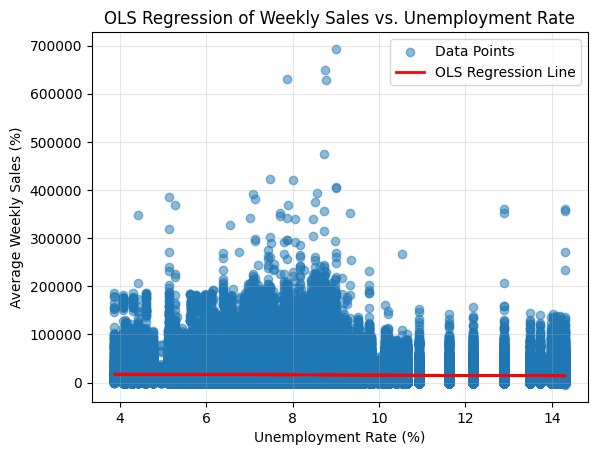

In [18]:
#Plotting the graph

plt.scatter(X['Unemployment'], y, alpha=0.5, label='Data Points')
plt.plot(X['Unemployment'], ols_model.predict(X), color='red', linewidth=2, label='OLS Regression Line')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Average Weekly Sales (%)')
plt.title('OLS Regression of Weekly Sales vs. Unemployment Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Looking at the graph, the regression line is flat. This means that the model suggests that there is a weak correlation between Unemployment and Weekly Sales and Weekly Sales are driven by other factors such as holidays, Fuel Price, and CPI.

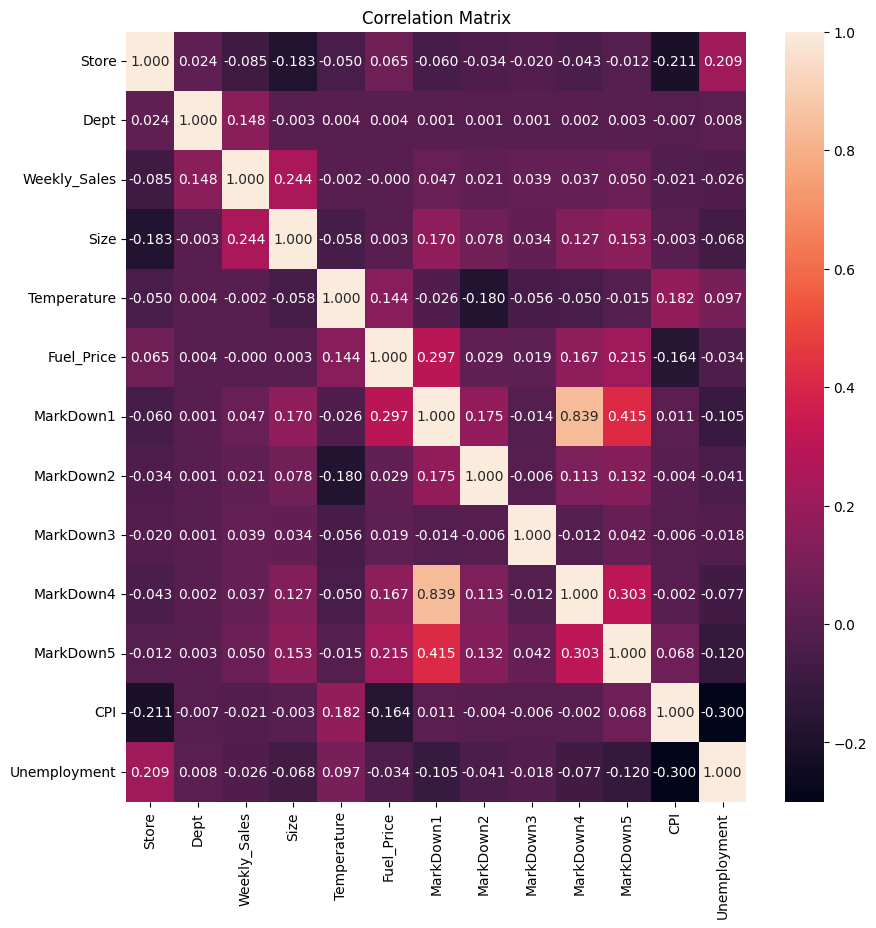

In [19]:
#Looking at the correlation of each factors in the dataset
corr = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Matrix')
plt.show()

3. Building a Prediction Model

a. Prediction Model with one feature

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Using Unemployment as our independent variable
#Weekly Sales as our dependent variable
X = data[['Unemployment']]
y = data['Weekly_Sales']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Prediction
y_pred = lr_model.predict(X_test)

#Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing out our mean absolute error, r2 score, and
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 521105643.1619888
Mean Absolute Error: 15170.68858629759
R-squared: 0.0007006136885089331


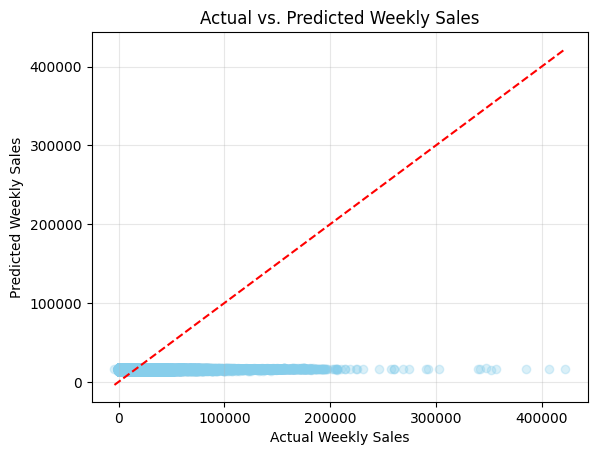

In [21]:
#Plot of the Actual vs. Predicted
plt.scatter(y_test, y_pred, alpha = 0.3, color='skyblue')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

We see that the plot shows that unemployment doesn't meaningfully predict weekly sales. Predictions doesn't follow the identity line and cluster near a constant value. This a possibility that we need to add more factors to get a better prediction.

3b. Prediction Model with More Than One Feature

In [22]:
#Adding other features as our independent variable
data_features = data[['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'IsHoliday' ]]

X = data_features
y = data['Weekly_Sales']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model process
multi_lr_model = LinearRegression()
multi_lr_model.fit(X_train, y_train)
y_pred = multi_lr_model.predict(X_test)

#Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing out our mean absolute error and r2 score
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 520525472.3266067
Mean Absolute Error: 15153.803056565019
R-squared: 0.0018131795709953602


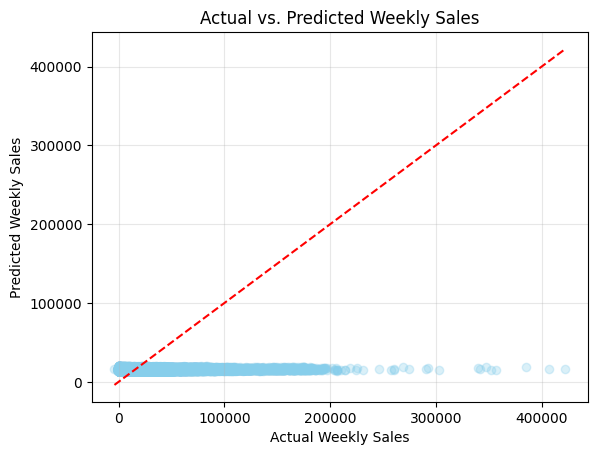

In [23]:
plt.scatter(y_test, y_pred, alpha = 0.3, color='skyblue')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

Comparing our r2_score between one feature and multi-feature, we see minimal jump, but it doesn't explain our weekly sale prediction. We will try to add a 3 week lag to see if we can get a better r2_score

Adding a 3-Week Lag Feature

In [24]:
#Creating a 3-week Lag of Weekly Sales
data['Lag_3_Week'] = data['Weekly_Sales'].shift(3)

#Drop rows with missing lag values
data = data.dropna(subset=['Lag_3_Week'])

#Features including lag
data_features = data[['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'IsHoliday', 'Lag_3_Week']]

X = data_features
y = data['Weekly_Sales']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model process
multi_lr_model = LinearRegression()
multi_lr_model.fit(X_train, y_train)
y_pred = multi_lr_model.predict(X_test)

#Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing out our values
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 85784231.69204865
Mean Absolute Error: 3446.435063835987
R-squared: 0.8351783977163318


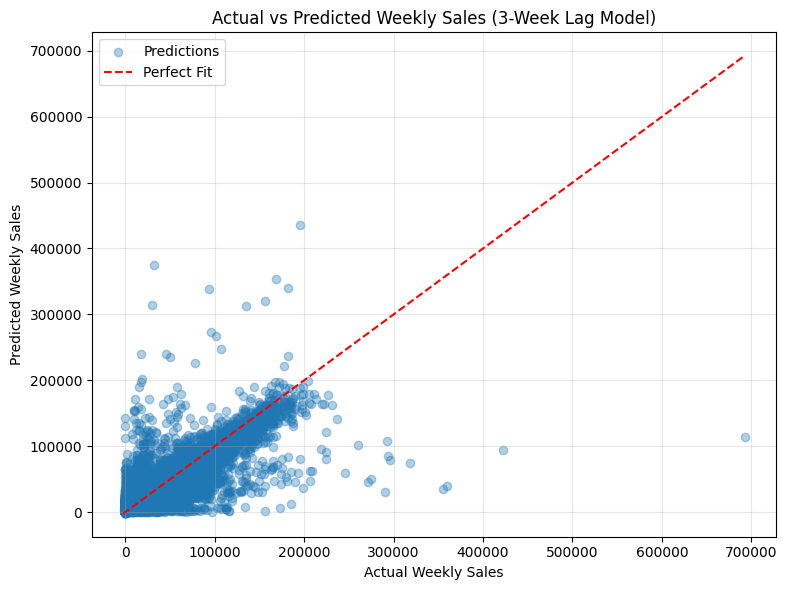

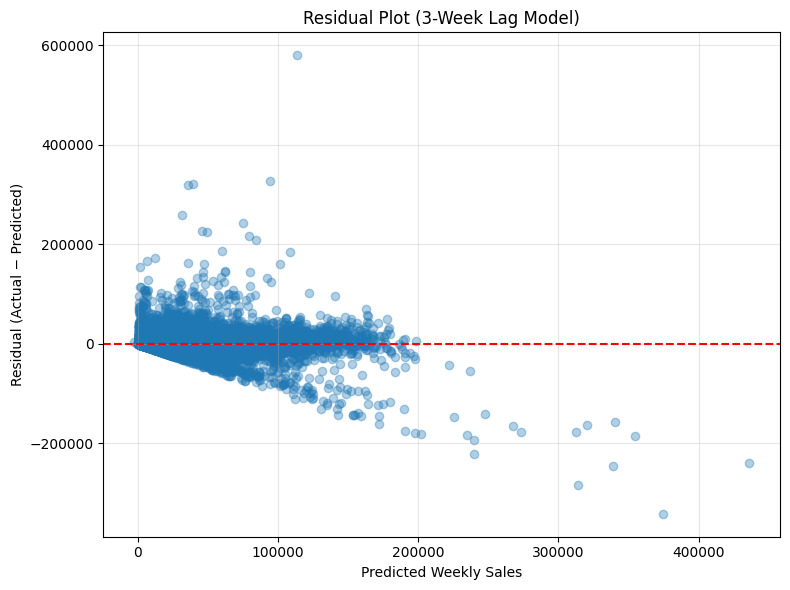

In [25]:
#Graphs for the 3 Week Lag

# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.35, label="Predictions")
lo = min(y_test.min(), y_pred.min()); hi = max(y_test.max(), y_pred.max())
plt.plot([lo, hi], [lo, hi], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Weekly Sales"); plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales (3-Week Lag Model)")
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.35)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Weekly Sales"); plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residual Plot (3-Week Lag Model)")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

Using a 3-Week Lag Feature, the model has improved dramatically with an r2_score of 83%, which shows that short-term demand cycles are the strongest predictor of weekly retail sales